# Data preprocessing

## Load data

In [ ]:
!pip install rdflib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 531.9/531.9 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 4.3 MB/s eta 0:00:00


In [ ]:
from rdflib import Graph, Namespace

# Load the ADO ontology
g = Graph()
g.parse("R-HSA-9748784_level3.owl", format="xml")  # Replace "path_to_doid.owl" with the actual path to your DOID ontology file

# Define namespaces
DO = Namespace("http://www.biopax.org/release/biopax-level3.owl#")  # Replace the namespace URI with the actual namespace URI in your ontology

# Save ontology triples to a file
triples_file = "ontology_triples.txt"
with open(triples_file, "w") as f:
    for subj, pred, obj in g:
        f.write(f"{subj}\t{pred}\t{obj}\n")

print("Ontology triples saved to", triples_file)

Ontology triples saved to ontology_triples.txt


In [ ]:
import json

# Execute SPARQL query
query = """
    SELECT ?gene ?disease
    WHERE {
        ?gene ?pred ?disease .
    }
"""
results = g.query(query)

# Process query results
interactions = {}
data = []
for row in results:
    gene = row['gene']
    disease = row['disease']
    # Update interactions dictionary
    if gene not in interactions:
        interactions[gene] = set()
    interactions[gene].add(disease)
    # Append data
    data.append((gene, disease))

# Save gene-disease associations to a file
associations_file = "gene_disease_associations.json"
with open(associations_file, "w") as f:
    json.dump(data, f, indent=4)
    #for gene, disease in data:
     #   f.write(f"{gene}\t{disease}\n")

print("Gene-disease associations saved to", associations_file)

Gene-disease associations saved to gene_disease_associations.json


## Split training, validation and testing data


In [ ]:
import numpy as np
import math

np.random.seed(seed=0) # Fix random seed for reproducibility
np.random.shuffle(data)
train_n = int(math.ceil(len(data) * 0.8))
valid_n = int(math.ceil(train_n * 0.8))
train_data = data[:valid_n]
valid_data = data[valid_n:train_n]
test_data = data[train_n:]
print('Number of training interactions:', len(train_data))
print('Number of validation interactions:', len(valid_data))
print('Number of testing interactions:', len(test_data))

Number of training interactions: 15376
Number of validation interactions: 3844
Number of testing interactions: 4805


## Save the data

In [ ]:
def save(filename, data):
    with open(filename, 'w') as f:
        for p1, p2 in data:
            f.write(f'{p1}\t{p2}\n')
            f.write(f'{p2}\t{p1}\n')

save(f'train.txt', train_data)
save(f'valid.txt', valid_data)
save(f'test.txt', test_data)

In [ ]:
#save as json
import json

def save(filename, data):
    with open(filename, 'w') as f:
        json.dump(data, f, indent=4)

save('train.json', train_data)
save('valid.json', valid_data)
save('test.json', test_data)


## Generate negative interactions

In [ ]:
import random
proteins =set ()
negatives = []
for (p1,p2) in data:
        proteins.add(p1)
        proteins.add(p2)
while len(negatives)<len(data):
        s = random.sample(proteins, 2)
        prot1= s[0]
        prot2= s[1]
        if (prot1,prot2) in negatives or (prot2,prot1) in negatives :
                 continue
       #if prot1 not in interactions[prot2]:
        negatives.append((prot1, prot2))
print('Total number of negative interactions:', len(negatives))
# Split negative data
neg_train_data = negatives[:valid_n]
neg_valid_data = negatives[valid_n:train_n]
neg_test_data = negatives[train_n:]
print('Number of negative training interactions:', len(neg_train_data))
print('Number of negative validation interactions:', len(neg_valid_data))
print('Number of negative testing interactions:', len(neg_test_data))
# Save negative data
save(f'train_negative_interactions.txt', neg_train_data)
save(f'valid_negative_interactions.txt', neg_valid_data)
save(f'test_negative_interactions.txt', neg_test_data)

<ipython-input-8-8586fa68e8ee>:8: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  s = random.sample(proteins, 2)


Total number of negative interactions: 40863
Number of negative training interactions: 26153
Number of negative validation interactions: 6538
Number of negative testing interactions: 8172


In [ ]:
#for drug disease and json
import random

# Extract drugs and diseases from the data
drugs = set()
diseases = set()
for drug, disease in data:
    drugs.add(drug)
    diseases.add(disease)

# Generate negative interactions between drugs and diseases
negatives = []
while len(negatives) < len(data):
    drug = random.sample(drugs, 1)[0]
    disease = random.sample(diseases, 1)[0]
    if (drug, disease) in data or (disease, drug) in data:
        continue
    negatives.append((drug, disease))

print('Total number of negative interactions:', len(negatives))

# Split negative data
neg_train_data = negatives[:valid_n]
neg_valid_data = negatives[valid_n:train_n]
neg_test_data = negatives[train_n:]

print('Number of negative training interactions:', len(neg_train_data))
print('Number of negative validation interactions:', len(neg_valid_data))
print('Number of negative testing interactions:', len(neg_test_data))

# Save negative data
save('train_negative_interactions.json', neg_train_data)
save('valid_negative_interactions.json', neg_valid_data)
save('test_negative_interactions.json', neg_test_data)


<ipython-input-8-ba0e0cb92d19>:14: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  drug = random.sample(drugs, 1)[0]
<ipython-input-8-ba0e0cb92d19>:15: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  disease = random.sample(diseases, 1)[0]


Total number of negative interactions: 24025
Number of negative training interactions: 15376
Number of negative validation interactions: 3844
Number of negative testing interactions: 4805


# Ontologies and text mining

Learn how text embeddings can be generated and used to facilitate learning from text.



In [ ]:
!pip install --upgrade Cython
!pip install gensim==4.0.0
!pip install scikit-learn
import matplotlib.pyplot as plt
from google.colab import drive
import gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.1/23.1 MB 11.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for gensim
  Running setup.py clean for gensim
Failed to build gensim
ERROR: Could not build wheels for gensim, which is required to install pyproject.toml-based projects


We create a dictionary for our ADO ontology

In [ ]:
!pip install owlready2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.3/27.3 MB 22.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for owlready2: filename=owlready2-0.45-cp310-cp310-linux_x86_64.whl size=24077439 sha256=58a3df9e3098bf97f4edf8588b1ab87ed85bf103a04820a836f72d1edb969cc6
  Stored in directory: /root/.cache/pip/wheels/5c/f4/9d/249b1671d391e3feddd443c7d0eb79a732afabc9f370591271
Successfully built owlready2


In [ ]:
from owlready2 import *

# Load the ontology
onto = get_ontology("R-HSA-9748784_level3.owl").load()

# Initialize dictionary
ontology_dict = {}

# Extract classes
for cls in onto.classes():
    # Extract class information (e.g., label, subclasses, individuals)
    class_info = {
        "label": cls.label.first(),
        "subclasses": [subclass.label.first() for subclass in cls.subclasses()],
        "individuals": [individual.label.first() for individual in cls.instances()]
    }
    # Add class information to dictionary
    ontology_dict[cls.name] = class_info

# Extract object properties
for prop in onto.object_properties():
    # Extract property information (e.g., label, domain, range)
    prop_info = {
        "label": prop.label.first(),
        "domain": [domain.label.first() for domain in prop.domain],
        "range": [range.label.first() for range in prop.range]
    }
    # Add property information to dictionary
    ontology_dict[prop.name] = prop_info

# Extract data properties (similar to object properties)

# Print or save the ontology dictionary
print(ontology_dict)


{}


In [ ]:
import json

# Save the drug ADME ontology dictionary to a JSON file
ontology_dict_file = "drug_adme_ontology.json"
with open(ontology_dict_file, "w") as f:
    json.dump(drug_adme_ontology_dict, f, indent=4)

print("Drug ADME ontology dictionary saved to", ontology_dict_file)


Let us look at the following text:

In [ ]:
text="John, a middle-aged man, began experiencing unusual changes in his behavior. He became forgetful, often forgetting important appointments and tasks. His family noticed that he struggled with reasoning and frequently had difficulty expressing himself clearly. Additionally, John seemed to have trouble recognizing familiar faces, including those of his own family members. Concerned about these cognitive symptoms, John's family decided to seek medical advice."

Using a dictionary, let us first split the text into words. We do that by using the space as a delimiter. We next look up each word in our dictionary.


In [ ]:
tokens = text.split(' ')
print('The splitted text looks as follows: ', tokens)
for i,token in enumerate(tokens):
  if token in ontology_dict:
    print('Identified mention of a class: ',token, 'which is the',i+1,'th token, is an instance of:', ontology_dict[token])

The splitted text looks as follows:  ['John,', 'a', 'middle-aged', 'man,', 'began', 'experiencing', 'unusual', 'changes', 'in', 'his', 'behavior.', 'He', 'became', 'forgetful,', 'often', 'forgetting', 'important', 'appointments', 'and', 'tasks.', 'His', 'family', 'noticed', 'that', 'he', 'struggled', 'with', 'reasoning', 'and', 'frequently', 'had', 'difficulty', 'expressing', 'himself', 'clearly.', 'Additionally,', 'John', 'seemed', 'to', 'have', 'trouble', 'recognizing', 'familiar', 'faces,', 'including', 'those', 'of', 'his', 'own', 'family', 'members.', 'Concerned', 'about', 'these', 'cognitive', 'symptoms,', "John's", 'family', 'decided', 'to', 'seek', 'medical', 'advice.']


In [ ]:
# Define text
text = "John, a middle-aged man, began experiencing unusual changes in his behavior. He became forgetful, often forgetting important appointments and tasks. His family noticed that he struggled with reasoning and frequently had difficulty expressing himself clearly. Additionally, John seemed to have trouble recognizing familiar faces, including those of his own family members. Concerned about these cognitive symptoms, John's family decided to seek medical advice."

# Split text into tokens
tokens = text.split(' ')
print('The splitted text looks as follows: ', tokens)

# Initialize list to store identified mentions
identified_mentions = []

# Look up each word in the ontology dictionary
for token in tokens:
    # Remove punctuation marks
    token = token.strip(',.').lower()  # Convert to lowercase and remove punctuation
    if token in ontology_dict:
        identified_mentions.append((token, ontology_dict[token]))

# Print identified mentions
for i, (token, info) in enumerate(identified_mentions):
    print(f"Mention {i+1}: '{token}' is an instance of {info['label']} with subclasses {info['subclasses']} and individuals {info['individuals']}")


The splitted text looks as follows:  ['John,', 'a', 'middle-aged', 'man,', 'began', 'experiencing', 'unusual', 'changes', 'in', 'his', 'behavior.', 'He', 'became', 'forgetful,', 'often', 'forgetting', 'important', 'appointments', 'and', 'tasks.', 'His', 'family', 'noticed', 'that', 'he', 'struggled', 'with', 'reasoning', 'and', 'frequently', 'had', 'difficulty', 'expressing', 'himself', 'clearly.', 'Additionally,', 'John', 'seemed', 'to', 'have', 'trouble', 'recognizing', 'familiar', 'faces,', 'including', 'those', 'of', 'his', 'own', 'family', 'members.', 'Concerned', 'about', 'these', 'cognitive', 'symptoms,', "John's", 'family', 'decided', 'to', 'seek', 'medical', 'advice.']


We can visualize the embeddings of the ontology classes that we have:




In [ ]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import string

# Function to preprocess text
def preprocess_text(text):
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Convert to lowercase
    text = text.lower()
    return text

# Read the text corpus from the .txt file and tokenize it
corpus_file_path = 'corpus.txt'  # Replace 'your_corpus.txt' with the path to your .txt file
with open(corpus_file_path, 'r', encoding='utf-8') as file:
    # Iterate over each line in the file and tokenize it
    tokenized_corpus = [word_tokenize(preprocess_text(line)) for line in file]

# Train Word2Vec model
model = Word2Vec(sentences=tokenized_corpus, vector_size=100, window=5, min_count=1, workers=4)

# Save the trained model
model.save("word2vec_model.bin")


# mOWL installation

mOWL is available on the [PyPi repository](https://pypi.org/project/mowl-borg/) and the source code is available on [Github](https://github.com/bio-ontology-research-group/mowl). For this tutorial we will install mOWL from PyPi using the following command:

In [ ]:
!pip install mowl-borg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.9/68.9 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 39.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 739.3/739.3 kB 48.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 379.9/379.9 kB 34.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 48.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 55.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 75.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 876.1 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

## Import mOWL

mOWL interfaces the OWL API. For this, we need to interface with the Java Virtual Machine (JVM).

In [ ]:
import mowl
mowl.init_jvm("10g") # amount of memory assigned to the JVM

Now, let's import some objects from the OWLAPI and Java

In [ ]:
import os
from java.util import HashSet
from mowl.owlapi import OWLAPIAdapter
from org.semanticweb.owlapi.model import IRI

In [ ]:
from mowl.projection.taxonomy.model import TaxonomyProjector

In [ ]:
# built-in imports
import sys
# sys.path.append('../../')
from sklearn.neural_network import MLPClassifier
from sklearn.metrics.pairwise import cosine_similarity
import json
import mowl
mowl.init_jvm("10g") #it was 4g
import torch as th
import logging
import numpy as np
import random
import math
import pickle as pkl
from mowl.visualization.base import TSNE
import matplotlib.pyplot as plt
from mowl.projection.edge import Edge
from mowl.projection import DL2VecProjector
from mowl.datasets import PathDataset
from pykeen.models import TransE,ConvE,DistMult,TransR,TransD
from mowl.projection.dl2vec.model import DL2VecProjector
from mowl.kge import KGEModel
from mowl.evaluation.rank_based import EmbeddingsRankBasedEvaluator
from mowl.evaluation.base import TranslationalScore, CosineSimilarity
from mowl.projection.factory import projector_factory, PARSING_METHODS
from mowl.walking import DeepWalk
from gensim.models.word2vec import LineSentence
import gensim
from gensim.models import Word2Vec
from mowl.evaluation.rank_based import EmbeddingsRankBasedEvaluator
from mowl.evaluation.base import CosineSimilarity
from mowl.projection import TaxonomyWithRelationsProjector
from mowl.projection.edge import Edge

import warnings
warnings.filterwarnings(action='ignore',category=UserWarning,module='gensim')
warnings.filterwarnings(action='ignore',category=FutureWarning,module='gensim')

Build the annotations

In [ ]:
from mowl.ontology.extend import insert_annotations

gene_disease_associations = ("gene_disease_associations.json","http://is_associated_with/", True)

annotations = [gene_disease_associations] # There could be more than 1 annotations file.#diseases_annotations , genes_annotations,

# A new ontology created with the annotation
insert_annotations("R-HSA-9748784_level3.owl", annotations, out_file = "R-HSA-9748784_level3_with_annotations.owl" )


In [ ]:
from mowl.datasets import PathDataset
dataset = PathDataset("R-HSA-9748784_level3_with_annotations.owl")
axioms=dataset.ontology.getAxioms()

In [ ]:
file_path = "axioms.txt"

# Open the file in write mode
with open(file_path, "w") as file:
    # Write each axiom to the file
    for axiom in axioms:
        file.write(str(axiom) + "\n")


# ELNormaliser

In [ ]:
!pip install owlready2

In [ ]:
from mowl.ontology.normalize import ELNormalizer, GCI
from owlready2 import *

ontology = dataset.ontology

normalizer = ELNormalizer()
gcis = normalizer.normalize(ontology)


de.tudresden.inf.lat.jcel.owlapi.translator.TranslationException: de.tudresden.inf.lat.jcel.owlapi.translator.TranslationException: This axiom is not supported: 'FunctionalDataProperty(<http://www.biopax.org/release/biopax-level3.owl#title>)'.

## Reasoners

In [ ]:
import mowl
mowl.init_jvm("10g")
from org.semanticweb.owlapi.apibinding import OWLManager

manager = OWLManager.createOWLOntologyManager()
ontology = manager.createOntology()

ontology.getClassesInSignature()

<java object 'java.util.Collections.EmptySet'>

In [ ]:
from mowl.owlapi import OWLAPIAdapter

adapter = OWLAPIAdapter()
owl_manager = adapter.owl_manager # Instance of org.semanticweb.owlapi.apibinding.OWLManager
data_factory = adapter.data_factory # Equivalent to owl_manager.getOWLDataFactory()

We can generate more axioms by performing reasoning over the current ontology. mOWL provides access to ELK and Hermit reasoners.

In [ ]:
from mowl.reasoning.base import MOWLReasoner
from org.semanticweb.HermiT import Reasoner

reasoner = Reasoner.ReasonerFactory().createReasoner(dataset.ontology)
reasoner.precomputeInferences()

mowl_reasoner = MOWLReasoner(reasoner)
classes_to_infer_over = list(dataset.ontology.getClassesInSignature())

subclass_axioms = mowl_reasoner.infer_subclass_axioms(classes_to_infer_over)
equivalence_axioms = mowl_reasoner.infer_equivalent_class_axioms(classes_to_infer_over)
disjointness_axioms = mowl_reasoner.infer_disjoint_class_axioms(classes_to_infer_over)

org.semanticweb.owlapi.reasoner.InconsistentOntologyException: org.semanticweb.owlapi.reasoner.InconsistentOntologyException: Inconsistent ontology

In [ ]:
total_inferred_axioms = len(subclass_axioms) + len(equivalence_axioms) + len(disjointness_axioms)

print("Total number of inferred axioms:", total_inferred_axioms)

NameError: name 'subclass_axioms' is not defined

In [ ]:
with open("hermit_reasoner_results.txt", "w") as file:
    file.write("Subclass axioms:\n")
    for axiom in subclass_axioms:
        file.write(str(axiom) + "\n")

    file.write("\nEquivalence axioms:\n")
    for axiom in equivalence_axioms:
        file.write(str(axiom) + "\n")

    file.write("\nDisjointness axioms:\n")
    for axiom in disjointness_axioms:
        file.write(str(axiom) + "\n")

The previous example uses the HermiT reasoner. We can also use ELK:

In [ ]:
from org.semanticweb.elk.owlapi import ElkReasonerFactory
reasoner_factory = ElkReasonerFactory()
reasoner = reasoner_factory.createReasoner(dataset.ontology)

mowl_reasoner = MOWLReasoner(reasoner)

(cgpt generated: Inferring New Axioms: Use the ELK reasoner to infer new axioms as a preprocessing step. This step will enhance the ontology with additional knowledge.)

In [ ]:
reasoner_factory = ElkReasonerFactory()
reasoner = reasoner_factory.createReasoner(dataset.ontology)
mowl_reasoner = MOWLReasoner(reasoner)

classes = dataset.ontology.getClassesInSignature()
subclass_axioms = mowl_reasoner.infer_subclass_axioms(classes)
equivalent_class_axioms = mowl_reasoner.infer_equivalent_class_axioms(classes)

adapter = OWLAPIAdapter()
manager = adapter.owl_manager

axioms = HashSet()
axioms.addAll(subclass_axioms)
axioms.addAll(equivalent_class_axioms)

manager.addAxioms(dataset.ontology, axioms)


<java object 'org.semanticweb.owlapi.model.parameters.ChangeApplied'>

Once the axioms were generated, it is time to add them to the ontology:

In [ ]:
from mowl.owlapi import OWLAPIAdapter

manager = OWLAPIAdapter().owl_manager

# Initialize a counter variable
total_axioms = 0

for ax in subclass_axioms:
    manager.addAxiom(dataset.ontology, ax)
    total_axioms += 1

for ax in equivalent_class_axioms:
    manager.addAxiom(dataset.ontology, ax)
    total_axioms += 1

'''for ax in classes:
    manager.addAxiom(dataset.ontology, ax)
    total_axioms += 1
'''
# Print the total count of axioms added
print("Total axioms added:", total_axioms)


Total axioms added: 92


In [ ]:
with open("elk_reasoner_results.txt", "w") as file:
    file.write("Subclass axioms:\n")
    for axiom in subclass_axioms:
        file.write(str(axiom) + "\n")

    file.write("\nEquivalence axioms:\n")
    for axiom in equivalence_axioms:
        file.write(str(axiom) + "\n")

    file.write("\nDisjointness axioms:\n")
    for axiom in disjointness_axioms:
        file.write(str(axiom) + "\n")

NameError: name 'equivalence_axioms' is not defined

# Syntactic Embeddings

In [ ]:
from mowl.corpus import extract_axiom_corpus
corpus = extract_axiom_corpus(dataset.ontology)
len(corpus)

69584

Let's see the corpus generated:

In [ ]:
for s in corpus[:10]:
    print(s)

http://Melissa Type http://Female
http://Jane Type http://Mother
http://Jane http://hasChild http://Melissa
http://Female and http://Parent SubClassOf http://Mother
http://Parent SubClassOf http://hasChild some http://Person
http://John http://hasChild http://Melissa
Individual: http://Robert
http://John Type http://Father
Class: http://Person
http://Person EquivalentTo http://Female or http://Male


In [ ]:
from mowl.corpus import extract_and_save_axiom_corpus
extract_and_save_axiom_corpus(dataset.ontology,
                              "/tmp/file_to_save_corpus",
                              mode="w")

In [ ]:
from mowl.corpus import extract_annotation_corpus
corpus = extract_annotation_corpus(dataset.ontology)
from mowl.corpus import extract_and_save_annotation_corpus
extract_and_save_annotation_corpus(dataset.ontology,
                              "/tmp/file_to_save_corpus",
                              mode="w")

NameError: name 'corpus' is not defined

In [ ]:
from mowl.corpus import extract_and_save_annotation_corpus

# Define an empty list to act as the placeholder for the corpus
corpus = []

# Call the function with the ontology and file path
extract_and_save_annotation_corpus(dataset.ontology,
                                    "/tmp/file_to_save_corpus",
                                    mode="w")

# Optionally, you can read the saved corpus from the file
with open("/tmp/file_to_save_corpus", "r") as f:
    saved_corpus = f.readlines()

# Print the saved corpus for verification
print(saved_corpus)

NameError: name 'corpus' is not defined

## Import three files ontology

In [ ]:
#first way to import ontology
from mowl.datasets.builtin import PPIYeastSlimDataset
ds = PPIYeastSlimDataset()
train_ontology = ds.ontology
valid_ontology = ds.validation
test_ontology = ds.testing

In [ ]:
#second way for my own ontologies
from mowl.datasets.base import PathDataset
ds = PathDataset("training_ontology.owl",
                 validation_path="validation_ontology.owl",
                 testing_path="testing_ontology.owl")

training_axioms = ds.ontology.getAxioms()
validation_axiom = ds.validation.getAxioms()
testing_axioms = ds.testing.getAxioms()

## Transform a triples from a .tsv to .owl

In [ ]:
from mowl.ontology.create import create_from_triples

triples_file = "my_triples_file.tsv"
out_file = "my_new_ontology.owl"

create_from_triples(triples_file, out_file)

In [ ]:
from mowl.ontology.create import create_from_triples

triples_file = "simpler_triples_file.tsv"
out_file = "my_new_ontology.owl"
prefix = "http://mowl/"
relation = "http://mowl/relation"

create_from_triples(triples_file,
                    out_file,
                    relation_name = relation,
                    bidirectional = True,
                    head_prefix=prefix,
                    tail_prefix=prefix)

# Graph-based embeddings



In [ ]:
from mowl.projection import CategoricalProjector

projector = CategoricalProjector()
edges = projector.project(dataset.ontology)

  1%|          | 243/28837 [00:00<00:22, 1249.81it/s]

process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom ty

  2%|▏         | 574/28837 [00:00<00:18, 1505.98it/s]

process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom ty

  3%|▎         | 890/28837 [00:00<00:18, 1490.50it/s]

process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyRange
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: 

  4%|▎         | 1040/28837 [00:00<00:34, 817.14it/s]

process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom ty

  5%|▍         | 1381/28837 [00:02<01:11, 382.93it/s]

process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom ty

  6%|▌         | 1705/28837 [00:02<00:43, 620.18it/s]

process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom ty

  7%|▋         | 2001/28837 [00:02<00:30, 867.70it/s]


process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
No edges found for EquivalentClasses axiom: EquivalentClasses(<http://www.biopax.org/release/biopax-level3.owl#SmallMoleculeReference>)
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_

  8%|▊         | 2327/28837 [00:03<00:24, 1102.78it/s]

process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom ty

  9%|▉         | 2655/28837 [00:03<00:19, 1329.63it/s]

process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom ty

 10%|█         | 2987/28837 [00:03<00:17, 1459.76it/s]


process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyDomain
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type

 12%|█▏        | 3363/28837 [00:03<00:16, 1580.05it/s]

process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom ty

 13%|█▎        | 3714/28837 [00:04<00:16, 1510.46it/s]

process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom ty

 14%|█▍        | 4115/28837 [00:04<00:14, 1740.00it/s]

process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom ty

 16%|█▌        | 4495/28837 [00:04<00:13, 1807.86it/s]

process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyDomain
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyRange
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: Dat

 17%|█▋        | 4932/28837 [00:04<00:12, 1934.26it/s]

process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom ty

 19%|█▊        | 5352/28837 [00:04<00:12, 1955.61it/s]

process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom ty

 20%|█▉        | 5762/28837 [00:05<00:11, 1959.85it/s]

process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: FunctionalDataProperty
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom t

 22%|██▏       | 6220/28837 [00:05<00:10, 2140.91it/s]

process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
No edges found for EquivalentClasses axiom: EquivalentClasses(<http://www.biopax.org/release/biopax-level3.owl#Complex>)
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown a

 23%|██▎       | 6673/28837 [00:05<00:20, 1101.20it/s]

process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom ty

 25%|██▍       | 7067/28837 [00:06<00:15, 1361.00it/s]

process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom ty

 26%|██▌       | 7497/28837 [00:06<00:12, 1678.75it/s]

process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom ty

 27%|██▋       | 7901/28837 [00:06<00:11, 1771.35it/s]

process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom ty

 29%|██▊       | 8273/28837 [00:06<00:12, 1659.11it/s]


process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom t

 29%|██▉       | 8449/28837 [00:06<00:12, 1596.78it/s]


process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom t

 30%|███       | 8777/28837 [00:07<00:13, 1490.94it/s]

process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom ty

 32%|███▏      | 9176/28837 [00:07<00:11, 1734.59it/s]

process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom ty

 33%|███▎      | 9540/28837 [00:07<00:11, 1716.48it/s]


process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom t

 34%|███▍      | 9891/28837 [00:07<00:11, 1722.11it/s]

process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom ty

 35%|███▍      | 10065/28837 [00:08<00:12, 1461.67it/s]


process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom t

 36%|███▌      | 10355/28837 [00:08<00:15, 1212.68it/s]

process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyRange
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: 

 37%|███▋      | 10636/28837 [00:08<00:14, 1291.19it/s]


process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom t

 38%|███▊      | 10898/28837 [00:08<00:15, 1123.48it/s]

process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: FunctionalDataProperty
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom t

 39%|███▊      | 11172/28837 [00:08<00:14, 1210.22it/s]

process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom ty

 40%|███▉      | 11431/28837 [00:09<00:26, 650.19it/s]

process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom ty

 41%|████      | 11812/28837 [00:09<00:15, 1079.59it/s]


process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom t

 42%|████▏     | 12176/28837 [00:10<00:12, 1381.16it/s]

process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom ty

 44%|████▎     | 12559/28837 [00:10<00:10, 1622.17it/s]

process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom ty

 45%|████▍     | 12952/28837 [00:10<00:08, 1782.59it/s]

process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom ty

 46%|████▋     | 13366/28837 [00:10<00:08, 1924.64it/s]

process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom ty

 48%|████▊     | 13781/28837 [00:10<00:07, 1988.37it/s]

process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom ty

 49%|████▉     | 14198/28837 [00:11<00:07, 2005.33it/s]

process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyDomain
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type:

 51%|█████     | 14643/28837 [00:11<00:06, 2098.51it/s]

process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom ty

 52%|█████▏    | 15058/28837 [00:11<00:06, 1970.09it/s]

process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom ty

 54%|█████▍    | 15504/28837 [00:11<00:06, 2107.99it/s]

process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom ty

 55%|█████▌    | 15925/28837 [00:11<00:06, 1939.85it/s]

process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom ty

 57%|█████▋    | 16318/28837 [00:12<00:06, 1876.09it/s]

process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom ty

 57%|█████▋    | 16507/28837 [00:12<00:07, 1644.99it/s]

process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom ty

 59%|█████▊    | 16903/28837 [00:12<00:12, 947.84it/s]

process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom ty

 61%|██████    | 17513/28837 [00:13<00:07, 1468.96it/s]

process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom ty

 62%|██████▏   | 17898/28837 [00:13<00:06, 1626.48it/s]

process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom ty

 64%|██████▎   | 18352/28837 [00:13<00:05, 1940.88it/s]

process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
No edges found for EquivalentClasses axiom: EquivalentClasses(<http://www.biopax.org/release/biopax-level3.owl#Stoichiometry>)
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unk

 65%|██████▌   | 18780/28837 [00:13<00:04, 2014.09it/s]

process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom ty

 66%|██████▌   | 18989/28837 [00:13<00:05, 1948.74it/s]

process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom ty

 68%|██████▊   | 19508/28837 [00:14<00:06, 1370.56it/s]

process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyRange
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: DataPropertyAssertion
process_axiom: Unknown axiom type: 

java.lang.NullPointerException: java.lang.NullPointerException

In [ ]:
from mowl.projection import TaxonomyProjector, TaxonomyWithRelationsProjector, DL2VecProjector, OWL2VecStarProjector

In [ ]:
projector = TaxonomyProjector(bidirectional_taxonomy = True)
edges = projector.project(dataset.ontology)

## Taxonomy projector (Hierarchy only)

In [ ]:
edges = TaxonomyProjector().project(dataset.ontology)

for edge in edges:
    src = edge.src.split("/")[-1]
    rel = edge.rel.split("/")[-1]
    dst = edge.dst.split("/")[-1]
    print(f"{src}\t{rel}\t{dst}")

biopax-level3.owl#BindingFeature	subclassof	biopax-level3.owl#EntityFeature
biopax-level3.owl#BioSource	subclassof	biopax-level3.owl#UtilityClass
biopax-level3.owl#BioSource	subclassof	owl#Thing
biopax-level3.owl#BiochemicalPathwayStep	subclassof	biopax-level3.owl#PathwayStep
biopax-level3.owl#BiochemicalReaction	subclassof	biopax-level3.owl#Conversion
biopax-level3.owl#BiochemicalReaction	subclassof	biopax-level3.owl#Entity
biopax-level3.owl#BiochemicalReaction	subclassof	biopax-level3.owl#Interaction
biopax-level3.owl#BiochemicalReaction	subclassof	owl#Thing
biopax-level3.owl#Catalysis	subclassof	biopax-level3.owl#Control
biopax-level3.owl#Catalysis	subclassof	biopax-level3.owl#Entity
biopax-level3.owl#Catalysis	subclassof	owl#Thing
biopax-level3.owl#Catalysis	subclassof	biopax-level3.owl#Interaction
biopax-level3.owl#CellVocabulary	subclassof	biopax-level3.owl#ControlledVocabulary
biopax-level3.owl#CellularLocationVocabulary	subclassof	biopax-level3.owl#ControlledVocabulary
biopax-l

In [ ]:
# Auxiliary method to create plots
def nx_network(edges):
    import networkx as nx
    import matplotlib.pyplot as plt
    G = nx.DiGraph()
    for edge in edges:
        src = edge.src.split("/")[-1]
        dst = edge.dst.split("/")[-1]
        G.add_edge(src, dst)
    #nx draw with custom colors
    plt.figure(figsize=(5,5))
    pos = nx.spring_layout(G)
    nx.draw(G, pos, edge_color='black', width=1, linewidths=1,
            node_size=500, node_color='cyan', alpha=0.9,
            labels={node:node for node in G.nodes()})
    #nx.draw(G, with_labels=True)
    plt.show()

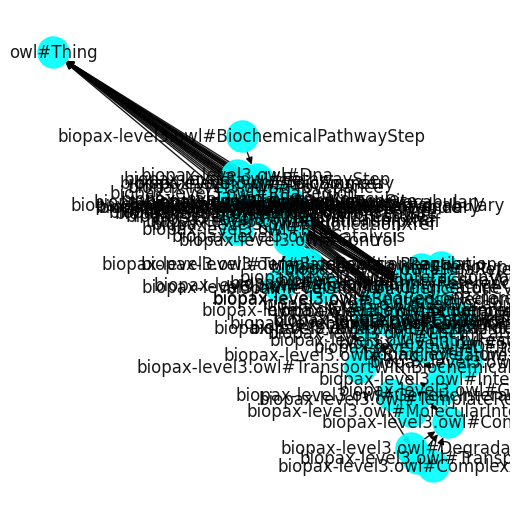

In [ ]:
nx_network(edges)

## DL2Vec projector

In [ ]:
dl2vec_proj = DL2VecProjector(bidirectional_taxonomy=True)
d2v_edges = dl2vec_proj.project(dataset.ontology, with_individuals=True)

for edge in d2v_edges:
    src = edge.src.split("/")[-1]
    rel = edge.rel.split("/")[-1]
    dst = edge.dst.split("/")[-1]
    print(f"{src}\t{rel}\t{dst}")

Η έξοδος ροής περικόπηκε στις τελευταίες 5000 γραμμές.
9748784#SmallMolecule248	biopax-level3.owl#xref	9748784#UnificationXref1360
9748784#BiochemicalReaction75	biopax-level3.owl#left	9748784#SmallMolecule13
9748784#Complex23	biopax-level3.owl#cellularLocation	9748784#CellularLocationVocabulary2
9748784#PathwayStep122	biopax-level3.owl#nextStep	9748784#PathwayStep125
9748784#PathwayStep15	biopax-level3.owl#nextStep	9748784#PathwayStep16
9748784#SmallMolecule220	biopax-level3.owl#cellularLocation	9748784#CellularLocationVocabulary1
9748784#SmallMolecule116	biopax-level3.owl#xref	9748784#UnificationXref646
9748784#RelationshipXref178	biopax-level3.owl#relationshipType	9748784#RelationshipTypeVocabulary4
9748784#SmallMolecule6	biopax-level3.owl#entityReference	9748784#SmallMoleculeReference3
9748784#SequenceInterval52	biopax-level3.owl#sequenceIntervalBegin	9748784#SequenceSite108
9748784#PhysicalEntity7	biopax-level3.owl#xref	9748784#UnificationXref1002
9748784#SmallMolecule213	biopax-le

In [ ]:
nx_network(d2v_edges)


KeyboardInterrupt: 

<Figure size 500x500 with 0 Axes>

## OWL2Vec* projector

In [ ]:
owl2vec_proj = OWL2VecStarProjector(bidirectional_taxonomy=True)
o2v_edges = owl2vec_proj.project(dataset.ontology)

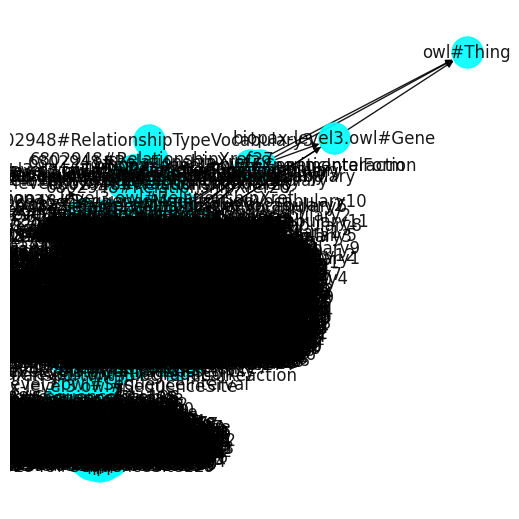

In [ ]:
nx_network(o2v_edges)


## Onto2Vec

In [ ]:
import mowl
mowl.init_jvm("20g")

from mowl.corpus import extract_and_save_axiom_corpus
from mowl.owlapi import OWLAPIAdapter
from mowl.reasoning import MOWLReasoner

from org.semanticweb.elk.owlapi import ElkReasonerFactory
from java.util import HashSet

from gensim.models.word2vec import LineSentence
from gensim.models import Word2Vec

import os

### Inferring new axioms

Onto2Vec uses an ontology reasoner to infer new axioms as a preprocessing step. In the original
paper, the authors used the HermiT reasoner. For this example, we use the ELK reasoner.



In [ ]:
reasoner_factory = ElkReasonerFactory()
reasoner = reasoner_factory.createReasoner(dataset.ontology)
mowl_reasoner = MOWLReasoner(reasoner)

In [ ]:
classes = dataset.ontology.getClassesInSignature()
subclass_axioms = mowl_reasoner.infer_subclass_axioms(classes)
equivalent_class_axioms = mowl_reasoner.infer_equivalent_class_axioms(classes)

We can now add the inferred axioms to the ontology.



In [ ]:
adapter = OWLAPIAdapter()
manager = adapter.owl_manager

axioms = HashSet()
axioms.addAll(subclass_axioms)
axioms.addAll(equivalent_class_axioms)

manager.addAxioms(dataset.ontology, axioms)

<java object 'org.semanticweb.owlapi.model.parameters.ChangeApplied'>

In [ ]:
total_inferred_axioms = len(subclass_axioms) + len(equivalent_class_axioms)

print("Total number of inferred axioms:", total_inferred_axioms)

Total number of inferred axioms: 119


### Generating the corpus and training the model

Now that we have an extended ontology, we can generate the corpus out of it. After that, we
can train the Word2Vec model.



In [ ]:
from mowl.corpus.base import extract_and_save_axiom_corpus

extract_and_save_axiom_corpus(dataset.ontology, "onto2vec_corpus.txt")

sentences = LineSentence("onto2vec_corpus.txt")
model = Word2Vec(sentences, vector_size=5, window=2, min_count=1, workers=4)
#or model_onto
model.save("w2v_model.bin")

Similarity search

In [ ]:
# Perform similarity search or any other evaluation task with the generated embeddings
# Example: Calculate cosine similarity between two terms in the ontology
term1 = "http://www.reactome.org/biopax/87/9748784#PublicationXref61" #http://purl.obolibrary.org/obo/NCIT_C16861"
term2 = "http://www.reactome.org/biopax/87/9748784#SmallMolecule203"      #http://purl.obolibrary.org/obo/NCIT_C176312"
similarity = model.wv.similarity(term1, term2)
print(f"Cosine similarity between {term1} and {term2}: {similarity}")


Cosine similarity between http://www.reactome.org/biopax/87/9748784#PublicationXref61 and http://www.reactome.org/biopax/87/9748784#SmallMolecule203: 0.935394823551178


In [ ]:
genes, diseases = dataset.evaluation_classes
projector = TaxonomyWithRelationsProjector(taxonomy=False,
                                           relations=["http://is_associated_with"])

vectors = model.wv
evaluator = EmbeddingsRankBasedEvaluator(
    vectors,
    test_edges,
    CosineSimilarity,
    training_set=train_edges,
    head_entities = genes.as_str,
    tail_entities = diseases.as_str,
    device = 'cpu')

evaluator.evaluate(show=True)

AttributeError: 'NoneType' object has no attribute 'getClassesInSignature'

## OPA2Vec

In [ ]:
import mowl
mowl.init_jvm("20g")

from mowl.corpus import extract_and_save_axiom_corpus, extract_and_save_annotation_corpus
from mowl.owlapi import OWLAPIAdapter
from mowl.reasoning import MOWLReasoner

from org.semanticweb.elk.owlapi import ElkReasonerFactory
from java.util import HashSet

from gensim.models.word2vec import LineSentence
from gensim.models import Word2Vec

import os
from sklearn.metrics.pairwise import cosine_similarity

### Inferring new axioms

OPA2Vec uses an ontology reasoner to infer new axioms as a preprocessing step. In the original
paper, the authors used the HermiT reasoner. For this example, we use the ELK reasoner.



In [ ]:
reasoner_factory = ElkReasonerFactory()
reasoner = reasoner_factory.createReasoner(dataset.ontology)
mowl_reasoner = MOWLReasoner(reasoner)

In [ ]:
classes = dataset.ontology.getClassesInSignature()
subclass_axioms = mowl_reasoner.infer_subclass_axioms(classes)
equivalent_class_axioms = mowl_reasoner.infer_equivalent_class_axioms(classes)

In [ ]:
adapter = OWLAPIAdapter()
manager = adapter.owl_manager

axioms = HashSet()
axioms.addAll(subclass_axioms)
axioms.addAll(equivalent_class_axioms)

manager.addAxioms(dataset.ontology, axioms)

<java object 'org.semanticweb.owlapi.model.parameters.ChangeApplied'>

In [ ]:
total_inferred_axioms = len(subclass_axioms) + len(equivalence_axioms)

print("Total number of inferred axioms:", total_inferred_axioms)

Total number of inferred axioms: 15682


### Generating the corpus and training the model

Now that we have an extended ontology, we can generate the corpus out of it. After that, we
can train the Word2Vec model.



In [ ]:
extract_and_save_axiom_corpus(dataset.ontology, "opa2vec_corpus.txt")
#extract_and_save_annotation_corpus(dataset.ontology, "opa2vec_corpus.txt", mode="a")

sentences = LineSentence("opa2vec_corpus.txt")
model = Word2Vec(sentences, vector_size=5, window=2, min_count=1, workers=4) #perhaps vector_size=100, epochs=10, window=5, min_count=1, workers=10

## Random walk embeddings of a graph

After generating the graph, we can embed it in different ways. Two approaches are supported in mOWL:
- Embeddings based on random walks
- Embeddings based on KGE


In [ ]:
from mowl.walking.deepwalk.model import DeepWalk
walker =  DeepWalk(
             10, #num_walks,
             4, #walk_length or 8,
             0.1, #alpha
             outfile = "walks_dw.txt", # /optional/path/to/save/walks,
             workers = 4)

## Using the Taxonomy projection edges

In [ ]:
walker.walk(edges)

In [ ]:
from mowl.projection import Edge

edge1 = Edge("node_1", "rel", "node_2")
edge2 = Edge("node_1", "rel", "node_3")
edge3 = Edge("node_3", "rel", "node_4")

edges = [edge1, edge2, edge3]

## Filtered and non-filtered random walks

No filtered

In [ ]:
from mowl.walking import DeepWalk

walker = DeepWalk(6,3,alpha=0,outfile="no_filtered_walks", workers=4)
walker.walk(edges)

In [ ]:
with open("no_filtered_walks", "r") as f:
    lines = f.readlines()
    lines.sort()
    print(lines)

['node_1 rel node_2\n', 'node_1 rel node_2\n', 'node_1 rel node_3 rel node_4\n', 'node_1 rel node_3 rel node_4\n', 'node_1 rel node_3 rel node_4\n', 'node_1 rel node_3 rel node_4\n', 'node_2\n', 'node_2\n', 'node_2\n', 'node_2\n', 'node_2\n', 'node_2\n', 'node_3 rel node_4\n', 'node_3 rel node_4\n', 'node_3 rel node_4\n', 'node_3 rel node_4\n', 'node_3 rel node_4\n', 'node_3 rel node_4\n', 'node_4\n', 'node_4\n', 'node_4\n', 'node_4\n', 'node_4\n', 'node_4\n']


Filtered

In [ ]:
from mowl.walking import DeepWalk

walker2 = DeepWalk(3,3,alpha=0,outfile="filtered_walks", workers=4)
walker2.walk(edges, nodes_of_interest = ["node_1", "node_2"])

In [ ]:
with open("filtered_walks", "r") as f:
    lines = f.readlines()
    lines.sort()
    print(lines)

['node_1 rel node_2\n', 'node_1 rel node_3 rel node_4\n', 'node_1 rel node_3 rel node_4\n', 'node_2\n', 'node_2\n', 'node_2\n']


Hint: The walk node_3 rel node_4 is not included in this case because it does not contain any of the nodes_of_interest.

Note: In the case that any “filtering node” does not exist in the graph, a Warning will be raised.

## Generating embeddings
Once the walks are generated, they can be used to generate embeddings using, for example, a Word2Vec model:

In [ ]:
from gensim.models.word2vec import LineSentence
from gensim.models import Word2Vec

walk_corpus_file = walker.outfile
sentences = LineSentence(walk_corpus_file)

w2v_model = Word2Vec(sentences, vector_size = 20)

#w2v_model = Word2Vec(sentences)
#w2v_model.save("/tmp/my_word2vec_outfile")

After Word2Vec comes the similar words, before proceeding

In [ ]:
similar_words = w2v_model.wv.most_similar("gene", topn=7)
for word, score in similar_words:
    print(f'{word}: {score}')

KeyError: "Key 'gene' not present in vocabulary"

## Using the DL2Vec projection edges

In [ ]:
from mowl.walking.node2vec.model import Node2Vec
walker =  Node2Vec(
             10, #num_walks,
             10, #walk_length,
             outfile = "walks_n2v.txt", # /optional/path/to/save/walks,
             workers = 4)
walker.walk(edges)

In [ ]:
walk_corpus_file = walker.outfile
sentences = LineSentence(walk_corpus_file)

w2v_model = Word2Vec(sentences, vector_size=10)

In [ ]:
similar_words = w2v_model.wv.most_similar("http://purl.obolibrary.org/obo/NCIT_C13226", topn=7)
for word, score in similar_words:
    print(f'{word}: {score}')

KeyError: "Key 'http://purl.obolibrary.org/obo/NCIT_C13226' not present in vocabulary"

# KGE methods

## Embedding with KGE methods
PyKEEN integration

In [ ]:
from mowl.projection.edge import Edge
from mowl.projection import TaxonomyProjector

#proj = TaxonomyProjector(True)

#edges = proj.project(ds.ontology)

#edges = [Edge("node1", "rel1", "node3"), Edge("node5", "rel2", "node1"), Edge("node2", "rel1", "node1")] # example of edges
triples_factory = Edge.as_pykeen(edges, create_inverse_triples = True)

In [ ]:
from pykeen.models import TransE
pk_model = TransE(triples_factory=triples_factory, embedding_dim = 50, random_seed=42)

In [ ]:
print(pk_model)


TransE(
  (loss): MarginRankingLoss(
    (margin_activation): ReLU()
  )
  (interaction): TransEInteraction()
  (entity_representations): ModuleList(
    (0): Embedding(
      (_embeddings): Embedding(4, 50)
    )
  )
  (relation_representations): ModuleList(
    (0): Embedding(
      (_embeddings): Embedding(2, 50)
    )
  )
  (weight_regularizers): ModuleList()
)


In [ ]:
from mowl.kge import KGEModel

model = KGEModel(triples_factory, pk_model, epochs = 10, batch_size = 32)
model.train()
ent_embs = model.class_embeddings_dict
rel_embs = model.object_property_embeddings_dict

INFO:pykeen.triples.triples_factory:Creating inverse triples.


Training epochs on cpu:   0%|          | 0/10 [00:00<?, ?epoch/s]

INFO:pykeen.triples.triples_factory:Creating inverse triples.


Training batches on cpu:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/1 [00:00<?, ?batch/s]

In [ ]:
print("Entity embeddings shape:", ent_embs)
print("Relation embeddings shape:", rel_embs)

Entity embeddings shape: {'node_3': array([ 0.19814959,  0.02641506,  0.22257344, -0.14457633,  0.16934721,
        0.03629674,  0.02571767,  0.17435418, -0.24503392, -0.2092677 ,
        0.24910171, -0.16539025, -0.1833144 , -0.0062947 , -0.09171572,
       -0.04557827, -0.18403004,  0.09731773, -0.22099349,  0.02471527,
        0.14680345,  0.04230639,  0.03677447,  0.03737325, -0.06863566,
       -0.05145989, -0.10354751, -0.17046887, -0.13261613,  0.26911   ,
       -0.03584343,  0.09007774,  0.17532888, -0.02513771, -0.14479876,
       -0.17213248, -0.10476214,  0.08985399, -0.21580352, -0.03981812,
        0.10217287,  0.22319138,  0.07208925,  0.05340042,  0.17403406,
        0.13162395,  0.09550672, -0.07289038, -0.2049641 , -0.06488901],
      dtype=float32), 'node_2': array([-0.05392254,  0.01623636, -0.03368191,  0.11734893,  0.19000235,
       -0.11534218, -0.2717609 , -0.147974  , -0.12611236,  0.16322336,
       -0.18561444, -0.02801266, -0.05077846, -0.18064436,  0.13537

## Generating embeddings using a mOWL model


In [ ]:
from mowl.models import GraphPlusPyKEENModel
from mowl.projection import DL2VecProjector
from pykeen.models import TransE
import torch as th

model = GraphPlusPyKEENModel(dataset)
model.set_projector(DL2VecProjector())
model.set_kge_method(TransE, random_seed=42)
model.optimizer = th.optim.Adam
model.lr = 0.001
model.batch_size = 32
model.train(epochs = 2)

# Get embeddings

class_embs = model.class_embeddings
role_embs = model.object_property_embeddings
#ind_embs = model.individual_embeddings

Training epochs on cpu:   0%|          | 0/2 [00:00<?, ?epoch/s]

Training batches on cpu:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/6 [00:00<?, ?batch/s]

In [ ]:
print("Class embeddings shape:", class_embs)
print("Role embeddings shape:", role_embs)
#print("ind embeddings shape:", ind_embs)


Class embeddings shape: {'http://www.biopax.org/release/biopax-level3.owl#BioSource': array([-0.12856916, -0.19766825,  0.11387802,  0.18326475, -0.19495617,
        0.23606843,  0.10878347,  0.21049371, -0.18741748,  0.07073459,
        0.16119222,  0.13008627, -0.06843097,  0.15518428,  0.1182074 ,
       -0.15042306,  0.123928  , -0.11083877,  0.1952254 , -0.07945861,
       -0.15166879,  0.10610214, -0.1334964 , -0.10515848,  0.160673  ,
        0.21572995,  0.07852714,  0.21083581,  0.08973652, -0.03666817,
       -0.08466955, -0.05990414,  0.01149348, -0.02927294,  0.05477577,
        0.05871862, -0.15817378, -0.1407813 ,  0.19970453, -0.10037821,
        0.12254307,  0.22478907, -0.21651429,  0.04310549,  0.06381506,
       -0.1442239 , -0.05346413, -0.11202152, -0.23687762, -0.09121204],
      dtype=float32), 'http://www.biopax.org/release/biopax-level3.owl#BiochemicalReaction': array([-0.10032815,  0.12691037,  0.11935011,  0.03607479, -0.06218531,
        0.13739151,  0.06557

# Models embeddings the $EL$ language


In [ ]:
gci_datasets = el_dataset.get_gci_datasets()

AttributeError: 'PathDataset' object has no attribute 'get_gci_datasets'

That will return a collection of torch.utils.data.Dataset objects. If extended = False, then:
which means that only 4 normal forms were obtained after the normalization process. On the other hand, if extended = True, then:
in this case, normal forms 0, 1 and 3 have been split to consider apart the special cases where the
 concept appears in the right side of each GCI.

In [ ]:
from torch.utils.data import DataLoader
dataloader_gci0 = DataLoader(gci_datasets["gci0"])

NameError: name 'gci_datasets' is not defined

## The ELModule class
The ELEmbeddingModel

In [ ]:
import mowl
mowl.init_jvm("10g")
import torch as th

In [ ]:
from mowl.models.elembeddings.examples.model_ppi import ELEmPPI

model = ELEmPPI(dataset,
                embed_dim=30,
                margin=0.1,
                reg_norm=1,
                learning_rate=0.001,
                epochs=20,
                batch_size=4096,
                model_filepath=None,
                device='cpu')

model.train()

  0%|          | 0/20 [00:00<?, ?it/s]


de.tudresden.inf.lat.jcel.owlapi.translator.TranslationException: de.tudresden.inf.lat.jcel.owlapi.translator.TranslationException: This axiom is not supported: 'FunctionalDataProperty(<http://www.biopax.org/release/biopax-level3.owl#title>)'.

In [ ]:
from mowl.evaluation.rank_based import ModelRankBasedEvaluator

with th.no_grad():
    model.load_best_model()
    evaluator = ModelRankBasedEvaluator(
        model,
        device = "cpu",
        eval_method = model.eval_method
    )

    evaluator.evaluate(show=True)

FileNotFoundError: [Errno 2] No such file or directory: '/tmp/tmpg8l4by2q'

Total running time of the script: ( 3 minutes 31.689 seconds)

Estimated memory usage: 3429 MB

ELBoxEmbeddings

In [ ]:
import mowl
mowl.init_jvm("10g")
import torch as th

In [ ]:
from mowl.models.elboxembeddings.examples.model_ppi import ELBoxPPI

model = ELBoxPPI(dataset,
                 embed_dim=30,
                 margin=-0.05,
                 reg_norm=1,
                 learning_rate=0.001,
                 epochs=20,
                 batch_size=4096,
                 model_filepath=None,
                 device='cpu')

model.train()

AttributeError: Validation dataset is None.

In [ ]:
from mowl.evaluation.rank_based import ModelRankBasedEvaluator

with th.no_grad():
    model.load_best_model()
    evaluator = ModelRankBasedEvaluator(
        model,
        device = "cpu",
        eval_method = model.eval_method,
    )

    evaluator.evaluate(show=True)

FileNotFoundError: [Errno 2] No such file or directory: '/tmp/tmpoa3a1yqk'

Total running time of the script: ( 3 minutes 38.765 seconds)

Estimated memory usage: 2996 MB

In [ ]:
from mowl.models.elembeddings.examples.model_ppi import ELEmPPI

model = ELEmPPI(dataset, epochs=2)
model.train()

  0%|          | 0/2 [00:00<?, ?it/s]


de.tudresden.inf.lat.jcel.owlapi.translator.TranslationException: de.tudresden.inf.lat.jcel.owlapi.translator.TranslationException: This axiom is not supported: 'FunctionalDataProperty(<http://www.biopax.org/release/biopax-level3.owl#title>)'.

In [ ]:
import mowl
mowl.init_jvm("10g")

from mowl.corpus import extract_and_save_axiom_corpus
from mowl.projection import TaxonomyWithRelationsProjector
from gensim.models.word2vec import LineSentence
from gensim.models import Word2Vec

extract_and_save_axiom_corpus(dataset.ontology, "onto2vec_corpus")

corpus = LineSentence("onto2vec_corpus")
w2v_model = Word2Vec(corpus, epochs=5, vector_size=10)

In [ ]:
from mowl.evaluation.rank_based import EmbeddingsRankBasedEvaluator
from mowl.evaluation.base import CosineSimilarity
from mowl.projection import TaxonomyWithRelationsProjector

proteins = dataset.evaluation_classes

projector = TaxonomyWithRelationsProjector(taxonomy=False,
                                           relations=["http://interacts_with"])

evaluation_edges = projector.project(dataset.testing)
filtering_edges = projector.project(dataset.ontology)

AttributeError: 'NoneType' object has no attribute 'getClassesInSignature'

The gene-disease associations will be scoredc using cosine similarity. For that reason we use the CosineSimilarity class.

In [ ]:
vectors = w2v_model.wv
evaluator = EmbeddingsRankBasedEvaluator(vectors,
                                         edges,#evaluation_edges, training_set=train_edges,
                                         CosineSimilarity,
                                         training_set=filtering_edges, #training_set=train_edges,
                                         head_entities = proteins.as_str, #genes
                                         tail_entities = proteins.as_str, #diseases
                                         device = 'cpu'
                                         )

NameError: name 'filtering_edges' is not defined

In [ ]:
evaluator.evaluate(show=True)

NameError: name 'evaluator' is not defined

# Visualization

We can now visualize the embedding we generated using a dimensionality reduction method such as TSNE which projects the vectors on two dimensions.

In [ ]:
from numpy import array, random

embeddings = random.rand(100, 100)
names = [f"name_{i}" for i in range(100)]
classes = [1,2,3]
labels = [random.choice(classes) for _ in range(100)]

name_to_embedding = dict(zip(names, embeddings))
name_to_label = dict(zip(names, labels))

In [ ]:
import mowl
mowl.init_jvm("10g")

from mowl.visualization import TSNE


tsne = TSNE(name_to_embedding, name_to_label)
tsne.generate_points(250, workers=4)

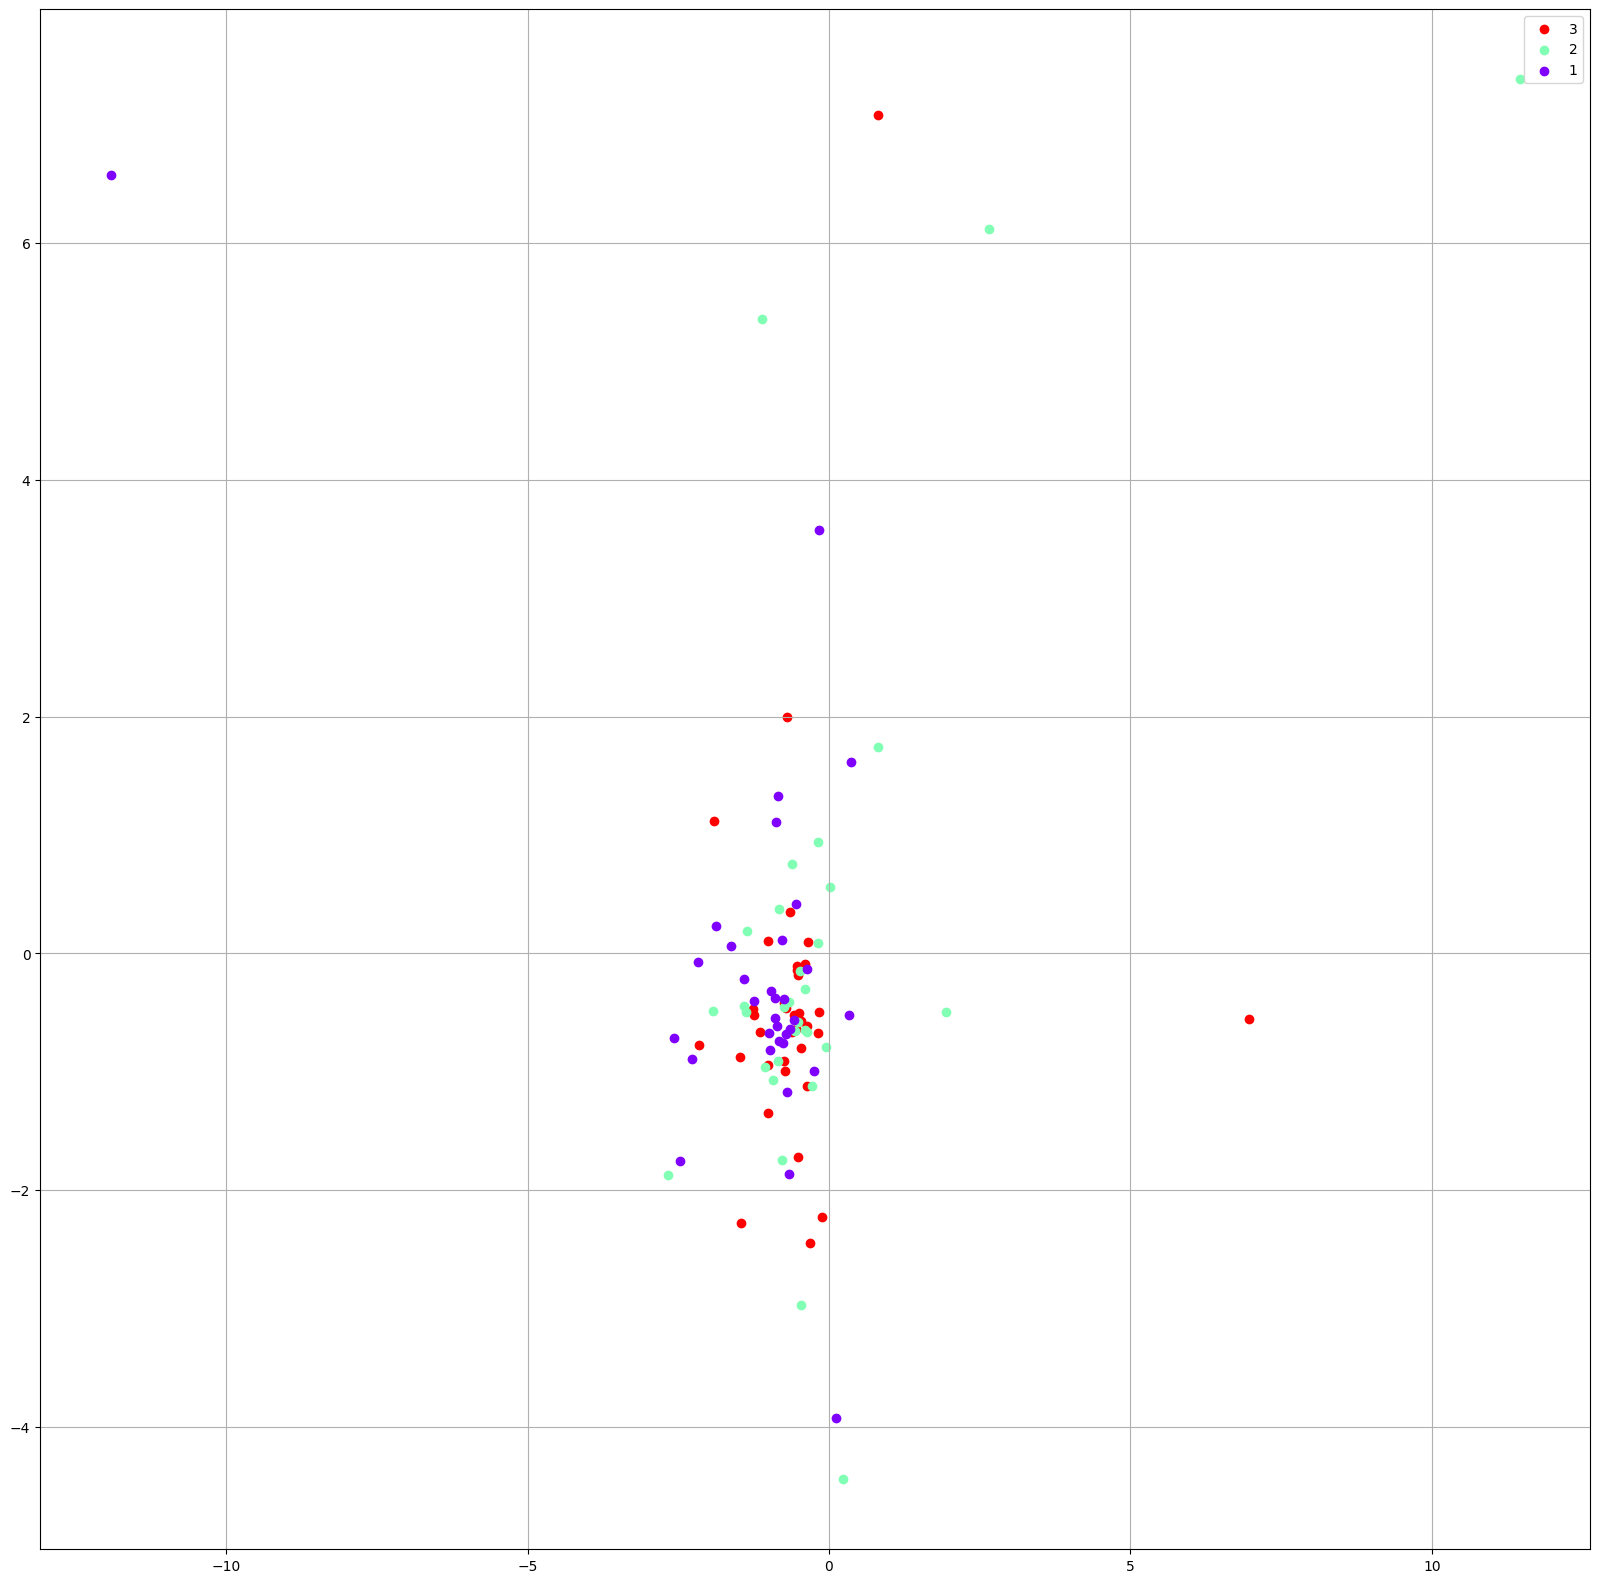

In [ ]:
tsne.show()

Visualization is not the only thing we can do with the vectors; we can also do similarity-based search, clustering, or use them as general feature vectors. We can search for similar proteins like this:
*ideas for filter and rank -> 4. graph-walks

In [ ]:
proteins = {}
for k, v in classes.items():
    if not k.startswith('http://GO:'):
        proteins[k] = v

print('Proteins: ', len(proteins))

AttributeError: 'list' object has no attribute 'items'

To adjust it for mine

In [ ]:
classes = {'0': [[], []]}
for item in nodemap.items():
    k, v = item
    if v in ec_numbers:
        ec = ec_numbers[v].split('.')[0]
        if ec not in classes:
            classes[ec] = [[], []]
        classes[ec][0].append(XN[k, 0])
        classes[ec][1].append(XN[k, 1])

colors = iter(plt.cm.rainbow(np.linspace(0, 1, len(classes))))
fig, ax = plt.subplots(figsize=(20, 20))

for ec, items in classes.items():
    if ec == '0':
        continue
    color = next(colors)
    ax.scatter(items[0], items[1], color=color, label=ec)

ax.legend()
ax.grid(True)
plt.savefig('data/fig_dl2vec_node2vec.jpg')

plt.show()

NameError: name 'nodemap' is not defined

In [ ]:
from mowl.visualization.base import TSNE #as MTSNE

vectors = w2v.wv
vocab_dict = vectors.key_to_index
name_to_label = {c: c.split("/")[-1] for c in vocab_dict if str(c).startswith("http://")}
name_to_emb = {c: vectors[[c]][0] for c in name_to_label}

tsne = TSNE(name_to_emb, name_to_label)
tsne.generate_points(epochs=300, workers=4, verbose=1)
tsne.show()

NameError: name 'w2v' is not defined

Ontologies and text mining

In [ ]:
# Collect the vectors for the genes and diseases
word2vec_file = 'w2v_model/wv_model'
vectors = Word2Vec.load(word2vec_file)

human_disease=[]
mouse_genes=[]
for classes in vectors.wv.index_to_key:
    if 'OMIM_' in classes:
        human_disease.append(classes)
    if 'http://' in classes and classes[7:].isnumeric():
        mouse_genes.append(classes)

human_disease_vectors=[]
for k in human_disease:
    human_disease_vectors.append(vectors.wv[k])

mouse_genes_vectors=[]
for k in mouse_genes:
    mouse_genes_vectors.append(vectors.wv[k])

similarity = cosine_similarity(np.array(human_disease_vectors),np.array(mouse_genes_vectors))

## Evaluating the embeddings: Evaluate the plausibility of gene-disease associations using cosine similarity.

Calculating cosine similarity to explore neighbors of each protein and finding most similar protein vectors. The interaction prediction is then performed based on similarity value based on the assumption that proteins with highly similar feature vectors are more like to interact

In [ ]:
from mowl.datasets import PathDataset
from mowl.projection import TaxonomyWithRelationsProjector
from mowl.evaluation import EmbeddingsRankBasedEvaluator#, CosineSimilarity
from gensim.models import Word2Vec

# Load your ontology
ontology_file_path = "ado (1).owl"
dataset = PathDataset(ontology_path=ontology_file_path)

# Load your pre-trained Word2Vec model
model = Word2Vec.load("word2vec_model.bin")

# Define the relations you want to use as test edges
relations_to_project = ["http://is_associated_with"]

# Project the specified relations from your ontology
projector = TaxonomyWithRelationsProjector(taxonomy=False, relations=relations_to_project)
test_edges = projector.project(dataset.ontology)

# Ensure test_edges is properly populated
assert len(test_edges) > 0

# Load genes and diseases for evaluation
genes, diseases = dataset.evaluation_classes

# Create the evaluator
vectors = model.wv
evaluator = EmbeddingsRankBasedEvaluator(
    vectors,
    test_edges,
    CosineSimilarity,
    head_entities=genes,
    tail_entities=diseases,
    device='cpu'
)

# Evaluate and show the results
evaluator.evaluate(show=True)


In [ ]:
genes, diseases = dataset.evaluation_classes
projector = TaxonomyWithRelationsProjector(taxonomy=False,
                                           relations=["http://is_associated_with"])

eval_train_edges = projector.project(dataset.ontology)
eval_test_edges = projector.project(dataset.testing)

vectors = model.wv
evaluator = EmbeddingsRankBasedEvaluator(
    vectors,
    eval_test_edges,
    CosineSimilarity,
    training_set=eval_train_edges,
    head_entities=genes.as_str,
    tail_entities=diseases.as_str,
    device='cpu')

evaluator.evaluate(show=True)


AttributeError: 'NoneType' object has no attribute 'getClassesInSignature'

### Collect all the scores:

In [ ]:
# Extract entities related to Alzheimer's disease
alzheimers_entities = []

# Loop through the classes in the ontology
for class_ in dataset.ontology.getClassesInSignature():
    class_label = str(class_.getIRI())
    # Check if the class label contains "Alzheimer" or "AD"
    if "Alzheimer" in class_label or "AD" in class_label:
        alzheimers_entities.append(class_label)

print("Entities related to Alzheimer's disease:")
for entity in alzheimers_entities:
    print(entity)

Entities related to Alzheimer's disease:
http://purl.obolibrary.org/obo/ADO_0000001
http://purl.obolibrary.org/obo/ADO_0000010
http://purl.obolibrary.org/obo/ADO_0000011
http://purl.obolibrary.org/obo/ADO_0000012
http://purl.obolibrary.org/obo/ADO_0000024
http://purl.obolibrary.org/obo/ADO_0000025
http://purl.obolibrary.org/obo/ADO_0000032
http://purl.obolibrary.org/obo/ADO_0000041
http://purl.obolibrary.org/obo/ADO_0000042
http://purl.obolibrary.org/obo/ADO_0000048
http://purl.obolibrary.org/obo/ADO_0000049
http://purl.obolibrary.org/obo/ADO_0000050
http://purl.obolibrary.org/obo/ADO_0000051
http://purl.obolibrary.org/obo/ADO_0000052
http://purl.obolibrary.org/obo/ADO_0000053
http://purl.obolibrary.org/obo/ADO_0000054
http://purl.obolibrary.org/obo/ADO_0000055
http://purl.obolibrary.org/obo/ADO_0000056
http://purl.obolibrary.org/obo/ADO_0000057
http://purl.obolibrary.org/obo/ADO_0000058
http://purl.obolibrary.org/obo/ADO_0000059
http://purl.obolibrary.org/obo/ADO_0000061
http://purl.o

In [ ]:
human_disease_vectors=[]
for k in human_disease:
    human_disease_vectors.append(vectors[k])

mouse_genes_vectors=[]
for k in mouse_genes:
    mouse_genes_vectors.append(vectors[k])

from sklearn.metrics.pairwise import cosine_similarity
similarity = cosine_similarity(np.array(human_disease_vectors),np.array(mouse_genes_vectors))

print(f"The dimentions of this matrix is {similarity.shape}")


The dimentions of this matrix is (8383, 14048)


## Evaluating the predictions to find the most similar genes:

Finding Similar Genes for a Specific Disease: After evaluating the embeddings, you can find the top similar genes for a specific disease by using the find_similar_genes function.

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Assuming you have embeddings for disease and gene entities
disease_embeddings = ...  # Embeddings for disease entities
gene_embeddings = ...     # Embeddings for gene entities

# Calculate cosine similarity between disease and gene embeddings
similarity_scores = cosine_similarity(disease_embeddings, gene_embeddings)

# Find the top similar genes for a specific disease
def find_similar_genes(disease_index, top_k=5):
    similar_genes_indices = similarity_scores[disease_index].argsort()[::-1][:top_k]
    similar_genes = [gene_entities[index] for index in similar_genes_indices]
    return similar_genes

# Example: Find similar genes for a specific disease (replace 'disease_index' with the index of your disease entity)
disease_index = 0  # Replace with the index of your disease entity
similar_genes = find_similar_genes(disease_index)
print("Top similar genes for the disease:", similar_genes)


## Finding Similar Genes for a Specific Disease: After evaluating the embeddings, you can find the top similar genes for a specific disease by using the find_similar_genes function.

In [ ]:
def find_similar_genes(disease_id, top_k, disease_genes_similarity_matrix, disease_keys, gene_keys):
    disease_index = disease_keys.index(disease_id)
    prediction_list = np.flip(np.argsort(disease_genes_similarity_matrix[disease_index]))
    top_genes = [gene_keys[prediction_list[x]] for x in range(top_k)]

    return top_genes

#associations from the file MGI_DO.rpt


#DOID:0080449	developmental and epileptic encephalopathy 16	OMIM:615338	mouse, laboratory	10090	Tbc1d24	224617	MGI:2443456
disease_id = 'http://OMIM_615338'
top_k = find_similar_genes(disease_id, 10 ,similarity, human_disease, mouse_genes )
print(f'The most similar gene to disease {disease_id.split("/")[2]} are: {top_k}')


#DOID:0080436	developmental and epileptic encephalopathy 4	OMIM:612164	human	9606	STXBP1	6812
#DOID:0060309	syndromic X-linked intellectual disability		human	9606	HNRNPH2	3188
#HNRNPH2	3188	Hnrnph2	MGI:1201779	MP:0001186, MP:0005386, MP:0010771
#disease_id = 'http://OMIM_612164'
#top_k = find_similar_genes(disease_id, 5 ,similarity, human_disease, mouse_genes )
#print(f'The most similar gene to disease {disease_id.split("/")[2]} are: {top_k}')


#OMIM_181500 : schizophrenia : DOID:5419	OMIM:181500	mouse, laboratory	10090	Magi2	50791	MGI:1354953
#disease_id = 'http://OMIM_181500'
#top_k = find_similar_genes(disease_id, 5 ,similarity, human_disease, mouse_genes )
#print(f'The most similar gene to disease {disease_id.split("/")[2]} are: {top_k}')


#OMIM_615643 : neurodegeneration with brain iron accumulation 6
#DOID:0110740	OMIM:615643	mouse, laboratory	10090	Coasy	71743	MGI:1918993
#disease_id = 'http://OMIM_615643'
#top_k = find_similar_genes(disease_id, 5 ,similarity, human_disease, mouse_genes )
#print(f'The most similar gene to disease {disease_id.split("/")[2]} are: {top_k}')


In [ ]:
def find_similar_genes(disease_id, top_k, disease_genes_similarity_matrix, disease_keys, gene_keys):
    disease_index = disease_keys.index(disease_id)
    prediction_list = np.flip(np.argsort(disease_genes_similarity_matrix[disease_index]))
    top_genes = [gene_keys[prediction_list[x]] for x in range(top_k)]

    return top_genes

disease_id = 'http://OMIM_608036'  # Adjust the disease ID as needed
number_of_genes = 10  # Adjust the number of genes to be ranked as needed

top_k = find_similar_genes(disease_id, number_of_genes, similarity, human_disease, mouse_genes)

print(f'The top {number_of_genes} most similar genes to disease {disease_id.split("/")[2]} are:')
for idx, genes in enumerate(top_k):
    print(f" Gene in Rank {idx+1} is : {top_k[idx]}")


NameError: name 'human_disease' is not defined

In [ ]:
def find_similar_genes(disease_id, top_k, disease_genes_similarity_matrix, disease_keys, gene_keys):
    disease_index = disease_keys.index(disease_id)
    prediction_list = np.flip(np.argsort(disease_genes_similarity_matrix[disease_index]))
    top_genes = [gene_keys[prediction_list[x]] for x in range(top_k)]

    return top_genes


vectors = model.wv


human_disease=[]
mouse_genes=[]
for classes in vectors.index_to_key:
    if 'OMIM' in classes:
        human_disease.append(classes)
    if 'http://' in classes and classes[7:].isnumeric():
        mouse_genes.append(classes)

human_disease_vectors=[]
for k in human_disease:
    human_disease_vectors.append(vectors[k])

mouse_genes_vectors=[]
for k in mouse_genes:
    mouse_genes_vectors.append(vectors[k])

similarity = cosine_similarity(np.array(human_disease_vectors),np.array(mouse_genes_vectors))

This code is a comprehensive example of using various methods for predicting gene-disease associations based on ontology and text mining. Let's break down the code into its main components and understand what each part does:

Imports and Setup: The code starts by importing necessary libraries and setting up the environment, including installing required packages, mounting Google Drive, and changing the working directory.

Dataset Preparation: It provides methods to build or use built-in datasets for gene-disease associations. These datasets are used for training and testing the prediction models.

Graph-Based Embeddings (DL2vec):

Projecting the Ontology: It projects the ontology into a graph format suitable for further processing. Generating Random Walks: Random walks are generated from the graph structure. Training the Word2Vec Model: Word2Vec model is trained on the generated random walks. Evaluating the Embeddings: Cosine similarity is used to evaluate the plausibility of gene-disease associations. Syntactic Embeddings (Onto2Vec, OPA2Vec): Similar to DL2vec, these methods involve projecting the ontology, generating random walks, training Word2Vec models, and evaluating embeddings. However, they may involve additional steps such as inferring new axioms and extracting annotations.

Ontologies and Text Mining: This section utilizes pre-trained Word2Vec embeddings to find similar genes for a given disease based on text mining.

Task Instructions: Instructions are provided for specific tasks, such as predicting similar genes for a given disease using different prediction methods.

Each method follows a similar pattern:

Preprocess the ontology or text data. Train a Word2Vec model on the processed data. Evaluate the trained embeddings using cosine similarity or other metrics.

# Gene-Disease Association Prediction with Combined Unsupervised and Supervised Methods

This is a simple implemantation that takes vectors of genes and diseases and positives dictionary and predict gene-disease association based on unsupervised and supervised methods.

Unsupervised approach uses cosine similarity

Supervised method uses MLP with one hidden layer and does the training on 10-fold-cross validation

Using those methods, we can find the most similar gene or genes to diseases inputs :

genes_vectors_filename : json dictionary {"gene_id":vector of real numbers as a list}

diseases_vectors_filename : json dictionary {"disease_id":vector of real numbers as a list}

positives_filename : json dictionary {"disease_id": list of gene ids}



Test files can be downloaded from here:

https://drive.google.com/drive/folders/1_z3-7dhZdF7MbIqDa2T1q4wMzZ809Db_?usp=sharing

These are embeddings generated using DL2Vec tool, on mouse phenotypes

In [ ]:
genes_vectors_filename = "mouse_genes_embedding.json"
diseases_vectors_filename = "human_diseases_embedding.json"
positives_filename = "mouse_positives.json"

## 1- Unsupervised Analysis

In this section we calculate the cosine similarity of genes and diseases, then we evaluate the prediction of gene-disease association

In [ ]:
with open(genes_vectors_filename,'r') as f:
    genes_vectors = json.load(f)
with open(diseases_vectors_filename,'r') as f:
    diseases_vectors = json.load(f)

with open(positives_filename,'r') as f:
    positives = json.load(f)

human_disease_vectors=[]
human_disease_keys = list(diseases_vectors.keys())
for key in human_disease_keys:
    human_disease_vectors.append(diseases_vectors[key])

mouse_genes_vectors=[]
mouse_genes_keys = list(genes_vectors.keys())
for key in mouse_genes_keys:
    mouse_genes_vectors.append(genes_vectors[key])


Similarity_matrix = cosine_similarity(np.array(human_disease_vectors),np.array(mouse_genes_vectors))

print("the dimentions of this matrix is ", Similarity_matrix.shape)


the dimentions of this matrix is  (12132, 14210)


After calculating cosine similarity between diseases and genes, we then can use these similarities to prdict gene-disease associations

Here we define a function that returns the most similar gene to each disease:

In [ ]:
def find_most_similar_gene(disease_id, disease_genes_similarity_matrix, disease_keys, gene_keys):
    disease_index = disease_keys.index(disease_id)
    prediction_list = np.flip(np.argsort(disease_genes_similarity_matrix[disease_index]))
    return gene_keys[prediction_list[0]]

def find_top_k_most_similar_genes(disease_id,k, disease_genes_similarity_matrix, disease_keys, gene_keys):
    disease_index = disease_keys.index(disease_id)
    prediction_list = np.flip(np.argsort(disease_genes_similarity_matrix[disease_index]))
    return [gene_keys[prediction_list[x]] for x in range(k)]

print("Testing with the disease (OMIM:106190) Isolated anhidrosis with normal morphology and number sweat glands (ANHD)")

top = find_most_similar_gene("OMIM:106190", Similarity_matrix, human_disease_keys, mouse_genes_keys )

print("The most similar gene to disease OMIM:106190 is "+ top)

top_5 = find_top_k_most_similar_genes("OMIM:106190",5, Similarity_matrix, human_disease_keys, mouse_genes_keys )

print("The most similar genes to disease OMIM:106190 are "+ " ".join(top_5))

Testing with the disease (OMIM:106190) Isolated anhidrosis with normal morphology and number sweat glands (ANHD)
The most similar gene to disease OMIM:106190 is MGI:99418
The most similar genes to disease OMIM:106190 are MGI:99418 MGI:4821354 MGI:1343498 MGI:2670747 MGI:3029925


## 2- Supervised Analysis

In this section we test simple MLP model for the prediction task

In [ ]:
# This method is used to generate negative samples
# input:
# # genes_keys: list of genes identifiers "must match the identifiers in the embeddings files"
# # diseases_keys: list of disease identifiers "must match the identifiers in the embeddings files"
# # positives: in a dictionary form
# # hard: binary setting for the split (if hard then negative genes are only sampled from the gene associated diseases)
# output:
# # negatives: in a dictionary, set of genes for each disease is sampled (ratio * number of positive genes)
# # new_positives: returns clean dictionary of positives diseases and genes where only those with representaions are retrived
# # pos_count
# # neg_count
#
# When data are generated the negative genes are selected in 2 ways: hard choise will select the negative genes from the disease associated genes only,
# not hard when the selection of the genes are from associated and non associated genes.
def generate_negatives(genes_keys, diseases_keys, positives, hard):
	negatives = {}
	new_positives = {}
	pos_count = 0
	neg_count = 0
	disease_associated_genes = set([])
	for disease in positives:
		if (disease in diseases_keys):
			for gene in positives[disease]:
				if(gene in genes_keys):
					if(disease not in new_positives):
						new_positives[disease]=set([])
					pos_count+=1
					disease_associated_genes.add(gene)
					new_positives[disease].add(gene)
	non_disease_associated_genes = set([])
	for gene in genes_keys:
		if gene not in disease_associated_genes:
			non_disease_associated_genes.add(gene)

	#genes can be associated or non associated genes
	if not hard:
		for disease in diseases_keys:
			if disease in positives:
				negatives[disease] = set([])
				for gene in genes_keys:
					neg_count+=1
					negatives[disease].add(gene)

	#genes are only the associated genes
	if hard:
		for disease in diseases_keys:
			if disease in positives:
				negatives[disease] = set([])
				for gene in genes_keys:
					if (gene not in positives[disease]) and gene not in non_disease_associated_genes:
						neg_count+=1
						negatives[disease].add(gene)
						break
	return negatives,new_positives, pos_count, neg_count

In [ ]:
def get_input_analysis(genes_vectors_filename, diseases_vectors_filename, positives_filename):
	genes_vectors = {}
	with open(genes_vectors_filename,'r') as f:
		genes_vectors = json.load(f)

	diseases_vectors = {}
	with open(diseases_vectors_filename,'r') as f:
		diseases_vectors = json.load(f)

	positives = {}
	with open(positives_filename,'r') as f:
		positives = json.load(f)

	diseases_keys = list(diseases_vectors.keys())
	genes_keys = list(genes_vectors.keys())

	new_positives={}
	for disease in positives:
		if (disease in diseases_keys):
			for gene in positives[disease]:
				if(gene in genes_keys):
					if(disease not in new_positives):
						new_positives[disease]=set([])
					new_positives[disease].add(gene)

	new_disease_keys = [x for x in diseases_keys if x in new_positives]

	print(len(new_disease_keys), len(genes_keys) , len(new_positives.keys()))

	return new_disease_keys,genes_keys,new_positives

In [ ]:
def get_input(genes_vectors_filename, diseases_vectors_filename ,positives_filename, ratio):
	genes_vectors = {}
	with open(genes_vectors_filename,'r') as f:
		genes_vectors = json.load(f)

	diseases_vectors = {}
	with open(diseases_vectors_filename,'r') as f:
		diseases_vectors = json.load(f)

	positives = {}
	with open(positives_filename,'r') as f:
		positives = json.load(f)

	diseases_keys = list(diseases_vectors.keys())
	genes_keys = list(genes_vectors.keys())

	negatives, new_positives, pos_count, neg_count = generate_negatives(genes_keys, diseases_keys, positives, hard)


	# Defining Feature Matrex
	X= np.empty(((ratio+1)*pos_count,Vector_size*2))
	y= np.empty((ratio+1)*pos_count)

	negative_diseases = list(negatives.keys())
	sample_number=0
	for disease in new_positives:
		for gene in new_positives[disease]:
			x = np.concatenate((diseases_vectors[disease],genes_vectors[gene]),axis=0)
			X[sample_number]=x
			y[sample_number]=1
			sample_number+=1


			for i in range(ratio):
				n = random.randint(0,len(negative_diseases))
				n_disease = negative_diseases[n-1]
				n = random.randint(0,len(negatives[n_disease]))
				n_gene = list(negatives[n_disease])[n-1]
				x = np.concatenate((diseases_vectors[n_disease],genes_vectors[n_gene]),axis=0)
				X[sample_number]=x
				y[sample_number]=0
				sample_number+=1
	return X,y

In [ ]:
def get_training_folds(genes_vectors_filename, diseases_vectors_filename ,positives,diseases_keys,genes_keys, ratio, fold):
	genes_vectors = {}
	with open(genes_vectors_filename,'r') as f:
		genes_vectors = json.load(f)

	diseases_vectors = {}
	with open(diseases_vectors_filename,'r') as f:
		diseases_vectors = json.load(f)

	start = int(len(diseases_keys)*fold/10)
	end = int(len(diseases_keys)*(fold+1)/10) - 1


	testing_disease_keys = diseases_keys[start:end]
	training_disease_keys = [x for x in diseases_keys if x not in testing_disease_keys]

	print(start,end,len(testing_disease_keys),len(training_disease_keys))

	negatives, new_positives, pos_count, neg_count = generate_negatives(genes_keys, training_disease_keys, positives, hard)


	# Defining Feature Matrex
	X= np.empty(((ratio+1)*pos_count,Vector_size*2))
	y= np.empty((ratio+1)*pos_count)

	negative_diseases = list(negatives.keys())
	sample_number=0

	for disease in new_positives:
		for gene in new_positives[disease]:
			x = np.concatenate((diseases_vectors[disease],genes_vectors[gene]),axis=0)
			X[sample_number]=x
			y[sample_number]=1
			sample_number+=1


			for i in range(ratio):
				n = random.randint(1,len(negative_diseases))
				n_disease = negative_diseases[n-1]
				n = random.randint(1,len(negatives[n_disease]))
				n_gene = list(negatives[n_disease])[n-1]
				x = np.concatenate((diseases_vectors[n_disease],genes_vectors[n_gene]),axis=0)
				X[sample_number]=x
				y[sample_number]=0
				sample_number+=1

	index = 0
	X_test= np.empty((len(testing_disease_keys)*len(genes_keys),Vector_size*2))
	y_test= np.empty(len(testing_disease_keys)*len(genes_keys))
	test_guide = {}
	for disease in testing_disease_keys:
		test_guide[disease] = {}
		for gene in genes_keys:
			test_guide[disease][gene] = index
			x = np.concatenate((diseases_vectors[disease],genes_vectors[gene]),axis=0)
			X_test[index]=x
			if(disease in new_positives):
				if(gene in new_positives[disease]):
					y_test[index]=1
				else:
					y_test[index]=0
			else:
				y_test[index]=0
			index+=1



	return X,y , X_test, y_test, test_guide

In [ ]:
hard = False
ratio = 5
Vector_size = 100

disease = []
genes = []

HDs_keys,OGs_keys,positives = get_input_analysis(genes_vectors_filename, diseases_vectors_filename, positives_filename)
OGs_HDs_sim = np.empty((len(HDs_keys),len(OGs_keys)))

for fold in range(10):
	print("-------------starting fold--------------")
	print(fold)
	X_train, y_train, X_test, y_test, test_guid = get_training_folds(genes_vectors_filename, diseases_vectors_filename, positives,HDs_keys, OGs_keys, ratio, fold)

	clf = MLPClassifier(hidden_layer_sizes=(Vector_size,), activation= "logistic", solver = "adam", alpha=0.0001, learning_rate= 'constant',learning_rate_init=0.001, random_state=42, max_iter=500, early_stopping=True).fit(X_train, y_train)
	result = clf.predict_proba(X_test)
	print("filling the results")
	for d in range(0,len(HDs_keys)):
		disease = HDs_keys[d]
		if disease in test_guid:
			for g in range(len(OGs_keys)):
				gene=OGs_keys[g]
				index = test_guid[disease][gene]
				OGs_HDs_sim[d][g] = result[index][1]

print("matrix is ready!")

3731 14210 3731
-------------starting fold--------------
0
0 372 372 3359


-----------------
Lets now test the supervised prediction

In [ ]:
print("Testing with the disease (OMIM:106190) Isolated anhidrosis with normal morphology and number sweat glands (ANHD)")

top = find_most_similar_gene("OMIM:106190", OGs_HDs_sim, HDs_keys, OGs_keys )

print("The most similar gene to disease OMIM:106190 is "+ top)

top_5 = find_top_k_most_similar_genes("OMIM:106190",5, OGs_HDs_sim, HDs_keys, OGs_keys )

print("The most similar genes to disease OMIM:106190 are "+ " ".join(top_5))

Testing with the disease (OMIM:106190) Isolated anhidrosis with normal morphology and number sweat glands (ANHD)
The most similar gene to disease OMIM:106190 is MGI:1923452
The most similar genes to disease OMIM:106190 are MGI:1923452 MGI:1261813 MGI:99605 MGI:104744 MGI:2671641


To integrate additional functionality into the provided code, I'll add a method for evaluating the performance of the supervised MLP model using metrics such as precision, recall, and F1-score. We can use scikit-learn's classification_report function to achieve this. Below is the modified code:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from sklearn.metrics import classification_report

# Function to evaluate the performance of the supervised MLP model
def evaluate_performance(y_true, y_pred):
    target_names = ['class 0', 'class 1']
    print(classification_report(y_true, y_pred, target_names=target_names))

# Assuming you have the true labels for the test data
# true_labels = load_true_labels_function()

# Evaluate the performance of the MLP model
# evaluate_performance(true_labels, predicted_labels)


You can call the evaluate_performance function after predicting the labels using the MLP model. Make sure to replace true_labels and predicted_labels with the appropriate variables containing the true labels and predicted labels, respectively.



---

Loading Data: The code starts by loading gene vectors, disease vectors, and positive associations from JSON files.

Calculating Cosine Similarity: It calculates the cosine similarity between diseases and genes using the gene and disease vectors loaded earlier. This similarity matrix is used in the unsupervised method for predicting gene-disease associations.

Unsupervised Analysis: It defines functions (find_most_similar_gene and find_top_k_most_similar_genes) to find the most similar genes to a given disease based on cosine similarity. Then, it tests the unsupervised approach by finding the most similar gene to a specific disease (OMIM:106190) and the top 5 most similar genes.

Supervised Analysis: It defines functions (generate_negatives, get_input, get_training_folds) to prepare input data and train a supervised MLP classifier for predicting gene-disease associations. It trains the MLP model on 10-fold cross-validation and fills a similarity matrix (OGs_HDs_sim) with the predicted probabilities of associations between genes and diseases.

Evaluation: After training the MLP model, it tests the supervised approach by finding the most similar gene to the disease OMIM:106190 and the top 5 most similar genes.

Performance Evaluation: It includes a function (evaluate_performance) to evaluate the performance of the supervised MLP model using metrics such as precision, recall, and F1-score. However, in the provided code, the evaluation is not directly performed. You need to uncomment the lines where true labels are loaded and predicted labels are obtained, and then call the evaluate_performance function with these labels.

Overall, the code combines unsupervised and supervised methods for predicting gene-disease associations, and it provides functionality to evaluate the performance of the supervised method using classification metrics.